On dispose maintenant de 9 courbes de potentiel dont la définition est étendue au voisinage de zero. Ces courbes sont lues et tracées par le programme ci-dessous.

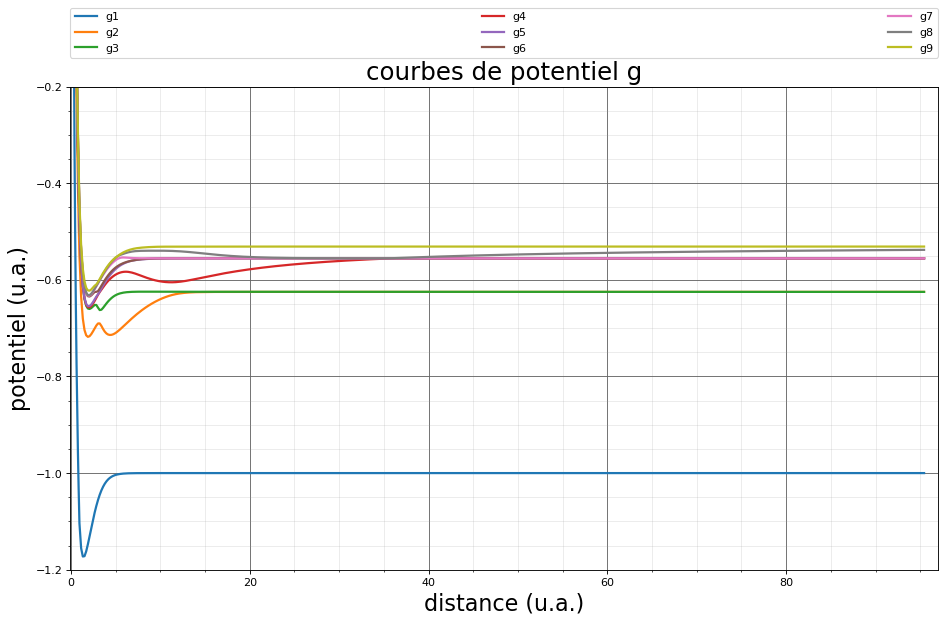

In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from textwrap import wrap
import random
#############################################################################
# ouverture des fichiers et lecture des données
with open ("pec_sigmag.txt", "r") as fichierg: # ouverture du fichier pec_sigmag.txt en mode lecture
    fichierg = open("pec_g.txt", "r")
echelle=1/0.529177
data_g = np.loadtxt(fichierg)
xg_read = data_g[:,0]*echelle

#########################################################################
# création des fonctions Vgi(x) et Vui(x) qui sont inexées et interpolent les potentiels Vgi et Vui
g1=interp1d(xg_read, data_g[:,1], kind='cubic')
g2=interp1d(xg_read, data_g[:,2], kind='cubic')
g3=interp1d(xg_read, data_g[:,3], kind='cubic')
g4=interp1d(xg_read, data_g[:,4], kind='cubic')
g5=interp1d(xg_read, data_g[:,5], kind='cubic')
g6=interp1d(xg_read, data_g[:,5], kind='cubic')
g7=interp1d(xg_read, data_g[:,5], kind='cubic')
g8=interp1d(xg_read, data_g[:,5], kind='cubic')
g9=interp1d(xg_read, data_g[:,5], kind='cubic')
Vg = [g1,g2,g3,g4,g5,g6,g7,g8,g9]


#############################################################################
# impressions et plot
figure(figsize=(14,8), dpi=80)
rcParams['axes.labelsize'] = 20
# Lignes d'unités principales
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Lignes de subdivision
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
xlabel("distance (u.a.)")
ylabel("potentiel (u.a.)")
plt.xlim(-0.1,97)
plt.ylim(-1.2,-0.2)
for ip in range(1,10):
    plt.plot(xg_read, data_g[:,ip],linewidth=2.0, label="g%d"%(ip,))
    
plt.title ("courbes de potentiel g", fontsize=22)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .106), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()


Les paramètres clé du calcul sont les suivants:

   $ x_0 = 80 \;a.u.$ valeur de départ et d'arrêt de l'Aller-retour
   
   $E_0= 10 eV = 0,3675 a.u.$ [ Cette énergie à l'infini vaut $\frac{\mu v_0^2}{2}$. On a donc $v_0 \simeq 0,028 \;a.u.$]
    
   courbe de potentiel $g_8$ (celle qui tend le moins vite vers son asymptote (en$1/r$)) 
   
   $b=5 \;a.u.$
    
 Afin d'établir les probabilités on a effectué 100 aller-retour (plusieurs minutes de calcul).   

In [9]:

x0=80. 
v0=-0.027  #valeur test à ~10 eV

b=5.

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918.


potentiel_départ=8

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 6000   
tps=10000
tp=np.linspace(0,tps,Mm)
dtp = (tp[1] - tp[0])/2

###############################################################################
# SOUS PROGRAMMES ET FONCTIONS
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def branche(xb,vb, Potentiel, Mm, index1):
########################
# Intégration "leapfrog"
    l=0
    index2=0
    i=1  
    while i in range(1,Mm-2) and xb[i]<80:
        
        k0=derivpot(xb[i],Potentiel)/m
        vb[i + 1] = vb[i] - dtp*(k0-((b*v0)**2)/xb[i]**3)
        xb[i + 1] = xb[i] + dtp*vb[i + 1]
        l=i
        
        
        if abs(xb[i+1])<1.1: 
            i=i+1
            continue
        
        else:
            
            index2, L_Z, vb[l], vb[l+1] =Landau(xb[i-1],xb[i],xb[i+1],vb[i],vb[i+1],index1, Potentiel)
            i=i+1
            
            if index2==index1:continue
               
            else:
                
                     
                break
            
        
    if  xb[l+1]>80:
        flg=0
              
    else:
        flg=1
                        
        
    return xb,vb,index2,index1,l+1,flg

############################################################################### 
# croisement
def Landau(x_1,x_2,x_3,v_2,v_3,asterix, Potentiel1):
        dV=zeros(3)
        La_Ze=0
        indef=asterix
        
        for jpf in range(1,9):
                    
            if jpf==asterix: continue
            else:
                Potentiel2=Vg[jpf]
                dV[0]=Potentiel1(x_1)-Potentiel2(x_1)
                dV[1]=Potentiel1(x_2)-Potentiel2(x_2)
                dV[2]=Potentiel1(x_3)-Potentiel2(x_3)
                delta=(dV[1]-dV[0])*(dV[2]-dV[1])
                    
                if delta>0 : continue
    
                else:
                    d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
                    d2V2=((m/2)*(b*v0/dtp)**2)*((1/x_3**2)-(2/x_2**2)+(1/x_1**2))
        
                    La_Ze=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*(d2V+d2V2)))))
                    
                    P=random.random()
                    
            
                    if La_Ze>P: 
                        a = verif_energie(x_3,v_3,asterix,jpf)
                        v_3=a
                        indef=jpf
                     
                    break
            
        return(indef, La_Ze, v_2,v_3)
############################################################################### 
# Vérification de l'énergie cinétique
def verif_energie(pos, vit2,potinit,potfin):
    
    potar1=Vg[potinit]
    
    potar2=Vg[potfin]
    
    Enrg=vit2**2-2*(potar2(pos)-potar1(pos))/m
    
    if Enrg < 0:
            
        vprim=vit2
            
    else:
#################################
# Mise à l'échelle de l'énergie   
                
        vprim = copysign(sqrt(Enrg),vit2)
        
    return vprim  
############################################################################### 
###############################################################################
# module représentation graphique (si nécessaire)
def graphique(indice1, indice2, x0, v0, tp, x, v,gf):
    rcParams["axes.grid"] = True
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 20


    plt.plot(tp,x,'g',linewidth=0.5, label='x')
    plt.plot(tp,v,'r',linewidth=0.5, label='v')

    xlabel("temps")
    express1="x(t) & v(t) in  u.a."
    ylabel(express1)

    plt.legend(loc='best', frameon= True)

    e1="g"+str(indice1)
    e2="g"+str(indice2)
    Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
    Titreb = "(pas de temps {}; croisement {} - {}; branche {})".format(Mm,e1,e2,gf)
    plt.title(Titrea % "\n".join(wrap(Titreb)))

    show()
    return
###############################################################################
###############################################################################
# REPRISE PROGRAMME PRINCIPAL
###############################################################################
# Initialisations des variables
###############################################################################

Nbmax=100 # nombre de trajets A-R accomplis sur un potentiel de départ donné

gfmax=2000 # nombre de branches maximum sur un aller-retour

Ntot=zeros((Nbmax)) # matrice des chemins
Probabl=zeros(9) # matrice des résultats


Nbdiff=0
#########################################################################
# boucle sur les trajets A-R
######################################################################
while Nbdiff<Nbmax:

########################
# Initialisation à 0 des variables, et Conditions initiales
    xinit = zeros(Mm)
    vinit = zeros(Mm)

    
    indice1 = potentiel_départ-1 # indice du potentiel de départ attention 2 est l'indice Vg de g3 d'où la soustraction
    Potentiel=Vg[indice1]

    
    xinit[0] = x0
    vinit[0] = v0
    k0= derivpot(x0,Potentiel)/m
    vinit[1] = vinit[0] - dtp*(k0-((b*v0)**2)/xinit[0]**3)
    xinit[1] = xinit[0] + dtp*vinit[1]
 

    

    gf=0
 #########################################################################
# boucle sur les branches
######################################################################   
    while gf<gfmax:
        x,v,indice2,indice1,nb,arrt = branche(xinit,vinit,Vg[indice1], Mm, indice1) #si nb=0 fin de la session
        if arrt==0: 
            #print('j ai fini le trajet en', gf,' coups. potentiel de départ g', potentiel_départ, 'potentiel d arrivée g', indice2+1)
            
            Ntot[Nbdiff]=indice2+1
            Probabl[indice2]=Probabl[indice2]+1
            break
        else:
            Potentiel=Vg[indice2]
            xinit = zeros(Mm)
            vinit = zeros(Mm)
            xinit[0] = x[nb]
            vinit[0] = v[nb]
            k0= derivpot(x0,Potentiel)/m
            vinit[1] = vinit[0] - dtp*(k0-((b*v0)**2)/xinit[0]**3)
            xinit[1] = xinit[0] + dtp*v[1]
            #print(gf,'je suis à l abscisse', xinit[1])
            #print('vitesse',vinit[1])
            #print('nouveau potentiel g', indice2+1)
            #graphique(indice1+1, indice2+1, x0, v0, tp, x, v,gf)
            
            indice1=indice2
            gf=gf+1
        if gf==gfmax:
            print('trop d A-R au pas', Nbdiff)
            break
        else: continue
    
    
    Nbdiff=Nbdiff+1

Probabl=Probabl/Nbmax

print(Ntot)
print(Probabl)



###############################################################################
########################


[2. 2. 4. 4. 4. 2. 4. 2. 4. 4. 3. 4. 2. 2. 3. 4. 4. 2. 2. 4. 3. 4. 2. 4.
 4. 2. 3. 3. 4. 4. 4. 4. 2. 3. 3. 4. 4. 2. 3. 3. 4. 1. 4. 3. 2. 2. 4. 2.
 2. 3. 2. 3. 4. 4. 2. 4. 4. 2. 4. 2. 4. 2. 4. 3. 4. 2. 2. 2. 3. 2. 2. 4.
 4. 4. 2. 3. 4. 3. 4. 4. 3. 4. 2. 4. 2. 4. 3. 2. 2. 3. 2. 4. 2. 3. 3. 2.
 4. 4. 2. 4.]
[0.01 0.35 0.21 0.43 0.   0.   0.   0.   0.  ]


In [ ]:
Lecture fichiers pos et plz

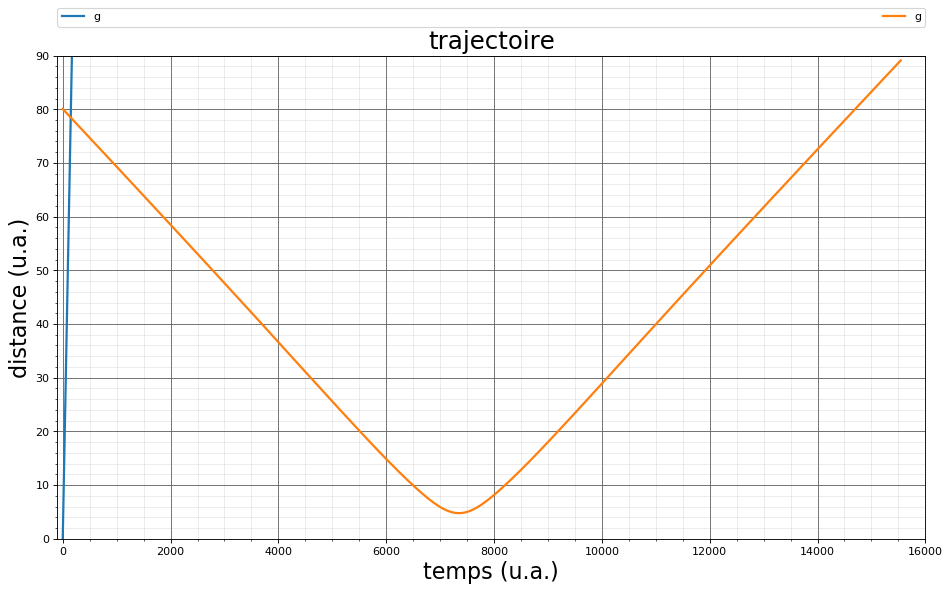

In [4]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from textwrap import wrap
import random
#############################################################################
# ouverture des fichiers et lecture des données
with open ("pos.txt", "r") as fichierg: # ouverture du fichier pos.txt en mode lecture
    fichierg = open("pos.txt", "r")
echelle=1/0.529177
datapo_g = np.loadtxt(fichierg)
posit_read = datapo_g[:,0]*echelle

with open ("plz.txt", "r") as fichierg: # ouverture du fichier pos.txt en mode lecture
    fichierg = open("plz.txt", "r")

#########################################################################
#############################################################################
# impressions et plot
figure(figsize=(14,8), dpi=80)
rcParams['axes.labelsize'] = 20
# Lignes d'unités principales
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Lignes de subdivision
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
xlabel("temps (u.a.)")
ylabel("distance (u.a.)")
plt.xlim(-100,16000)
plt.ylim(0,90)

plt.plot( posit_read, datapo_g,linewidth=2.0,label="g")
    
plt.title ("trajectoire", fontsize=22)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .106), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()


[8.] 0 3975
[0. 0. 0. 0. 0. 0. 0. 1. 0.]


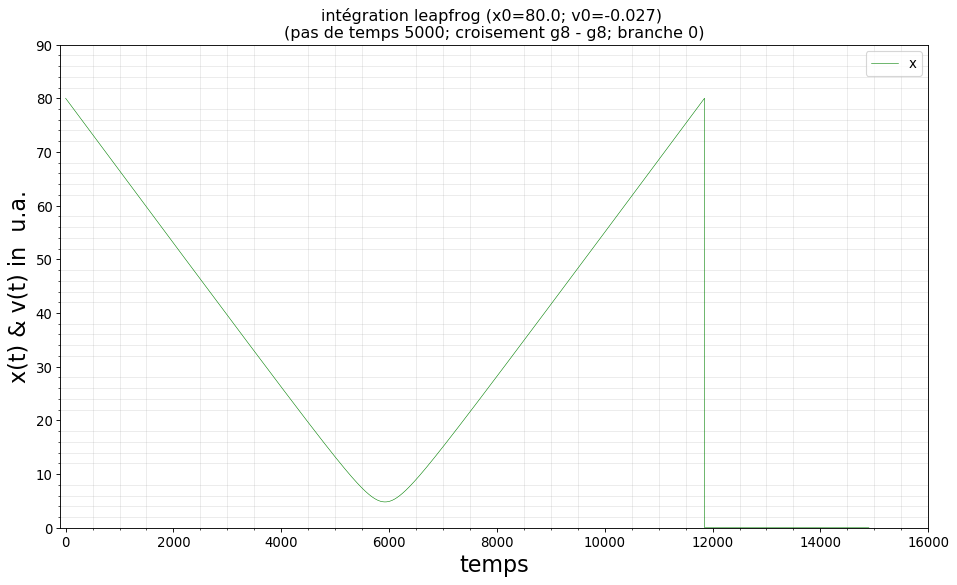

In [30]:
x0=80. 
v0=-0.027  #valeur test à ~10 eV

b=5.

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918.


potentiel_départ=8

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 5000   
tps=14900
tp=np.linspace(0,tps,Mm)
dtp = (tp[1] - tp[0])*0.5


###############################################################################
# SOUS PROGRAMMES ET FONCTIONS
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def branche(xb,vb, Potentiel, Mm, index1):
########################
# Intégration "leapfrog"
    l=0
    index2=0
    i=1  
    while i in range(1,Mm-2) and xb[i]<80:
        
        k0=derivpot(xb[i],Potentiel)/m
        vb[i + 1] = vb[i] - dtp*(k0-((b*v0)**2)/xb[i]**3)
        xb[i + 1] = xb[i] + dtp*vb[i + 1]
        l=i
        
        
        if abs(xb[i+1])<1.1: 
            i=i+1
            continue
        
        else:
            
            index2, L_Z, vb[l], vb[l+1] =Landau(xb[i-1],xb[i],xb[i+1],vb[i],vb[i+1],index1, Potentiel)
            i=i+1
            
            if index2==index1:continue
               
            else:
                
                     
                break
            
        
    if  xb[l+1]>80:
        flg=0
              
    else:
        flg=1
                        
        
    return xb,vb,index2,index1,l+1,flg

############################################################################### 
# croisement
def Landau(x_1,x_2,x_3,v_2,v_3,asterix, Potentiel1):
        dV=zeros(3)
        La_Ze=0
        indef=asterix
        
        for jpf in range(1,9):
                    
            if jpf==asterix: continue
            else:
                Potentiel2=Vg[jpf]
                dV[0]=Potentiel1(x_1)-Potentiel2(x_1)
                dV[1]=Potentiel1(x_2)-Potentiel2(x_2)
                dV[2]=Potentiel1(x_3)-Potentiel2(x_3)
                delta=(dV[1]-dV[0])*(dV[2]-dV[1])
                    
                if delta>0 : continue
    
                else:
                    d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
                    d2V2=((m/2)*(b*v0/dtp)**2)*((1/x_3**2)-(2/x_2**2)+(1/x_1**2))
        
                    La_Ze=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*(d2V+d2V2)))))
                    
                    P=1 #random.random()
                    
                    global Provisoire
                    Provisoire=Provisoire+1
                    #print('croisement évité à x=',x_3 ,'potentiels Vg',jpf,'rang',asterix,'Landau-Zener', La_Ze)
     
            
                    if La_Ze>P: 
                        a = verif_energie(x_3,v_3,asterix,jpf)
                        v_3=a
                        indef=jpf
                     
                    break
            
        return(indef, La_Ze, v_2,v_3)
############################################################################### 
# Vérification de l'énergie cinétique
def verif_energie(pos, vit2,potinit,potfin):
    
    potar1=Vg[potinit]
    
    potar2=Vg[potfin]
    
    Enrg=vit2**2-2*(potar2(pos)-potar1(pos))/m
    
    if Enrg < 0:
            
        vprim=vit2
            
    else:
#################################
# Mise à l'échelle de l'énergie   
                
        vprim = copysign(sqrt(Enrg),vit2)
        
    return vprim  
############################################################################### 
###############################################################################
# module représentation graphique (si nécessaire)
def graphique(indice1, indice2, x0, v0, tp, x, v,gf):
    figure(figsize=(14,8), dpi=80)
    #rcParams["axes.grid"] = True
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 20
    plt.xlim(-100,16000)
    plt.ylim(0,90)


    plt.plot(tp,x,'g',linewidth=0.5, label='x')
    #plt.plot(tp,v,'r',linewidth=0.5, label='v')

    xlabel("temps")
    express1="x(t) & v(t) in  u.a."
    ylabel(express1)

    plt.legend(loc='best', frameon= True)

    e1="g"+str(indice1)
    e2="g"+str(indice2)
    Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
    Titreb = "(pas de temps {}; croisement {} - {}; branche {})".format(Mm,e1,e2,gf)
    plt.title(Titrea % "\n".join(wrap(Titreb)))

    show()
    return
###############################################################################
###############################################################################
# REPRISE PROGRAMME PRINCIPAL
###############################################################################
# Initialisations des variables
###############################################################################

Nbmax=1 # nombre de trajets A-R accomplis sur un potentiel de départ donné

gfmax=2000 # nombre de branches maximum sur un aller-retour

Ntot=zeros((Nbmax)) # matrice des chemins
Probabl=zeros(9) # matrice des résultats


Nbdiff=0
#########################################################################
# boucle sur les trajets A-R
######################################################################
while Nbdiff<Nbmax:

########################
# Initialisation à 0 des variables, et Conditions initiales
    xinit = zeros(Mm)
    vinit = zeros(Mm)

    
    indice1 = potentiel_départ-1 # indice du potentiel de départ attention 2 est l'indice Vg de g3 d'où la soustraction
    Potentiel=Vg[indice1]

    
    xinit[0] = x0
    vinit[0] = v0
    k0= derivpot(x0,Potentiel)/m
    vinit[1] = vinit[0] - dtp*(k0-((b*v0)**2)/xinit[0]**3)
    xinit[1] = xinit[0] + dtp*vinit[1]
 

    

    gf=0
 #########################################################################
# boucle sur les branches
######################################################################   
    while gf<gfmax:
        Provisoire=0
        x,v,indice2,indice1,nb,arrt = branche(xinit,vinit,Vg[indice1], Mm, indice1) #si nb=0 fin de la session
        if arrt==0: 
            #print('j ai fini le trajet en', gf,' coups. potentiel de départ g', potentiel_départ, 'potentiel d arrivée g', indice2+1)
            
            Ntot[Nbdiff]=indice2+1
            Probabl[indice2]=Probabl[indice2]+1
            break
        else:
            Potentiel=Vg[indice2]
            xinit = zeros(Mm)
            vinit = zeros(Mm)
            xinit[0] = x[nb]
            vinit[0] = v[nb]
            k0= derivpot(x0,Potentiel)/m
            vinit[1] = vinit[0] - dtp*(k0-((b*v0)**2)/xinit[0]**3)
            xinit[1] = xinit[0] + dtp*v[1]
            #print(gf,'je suis à l abscisse', xinit[1])
            #print('vitesse',vinit[1])
            #print('nouveau potentiel g', indice2+1)
            #graphique(indice1+1, indice2+1, x0, v0, tp, x, v,gf)
            
            indice1=indice2
            gf=gf+1
        if gf==gfmax:
            print('trop d A-R au pas', Nbdiff)
            break
        else: continue
    
    
    Nbdiff=Nbdiff+1

Probabl=Probabl/Nbmax

print(Ntot, gf, Provisoire)
print(Probabl)
graphique(indice1+1, indice2+1, x0, v0, tp, x, v,gf)


###############################################################################
########################
